In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import numpy as np
import cv2

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
rcParams['figure.figsize'] = 15, 10
img_gen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='constant',
        cval=0)

In [3]:
lena = cv2.imread('./lena.jpg')
lena = cv2.resize(lena, (200, 200))
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

emma = cv2.imread('./emma.jpg')
emma = cv2.resize(emma, (200, 200))
emma = cv2.cvtColor(emma, cv2.COLOR_BGR2RGB)

In [4]:
lena = np.array(lena, dtype=np.float32)
emma = np.array(emma, dtype=np.float32)

X = np.array([lena, emma, lena, emma])
print('The shape of X: {}'.format(X.shape))

# 要作為 ImageDataGenerator 的輸入，先確認 X 的 dimesnion 是 4 維，而且 shape 要符合 (#samples, img_height, img_width, #channels) 的格式。
# 如果只有一個 channel，如灰階，X 的 shape 可能會變成 (#samples, img_height, img_width)，此時需 reshape，讓資料集從 3 維變為 4 維。

The shape of X: (4, 200, 200, 3)


In [5]:
batch_gen = img_gen.flow(X, batch_size=1)
next(batch_gen).shape

(1, 200, 200, 3)

In [6]:
batch_gen = img_gen.flow(X, batch_size=2)
next(batch_gen).shape

(2, 200, 200, 3)

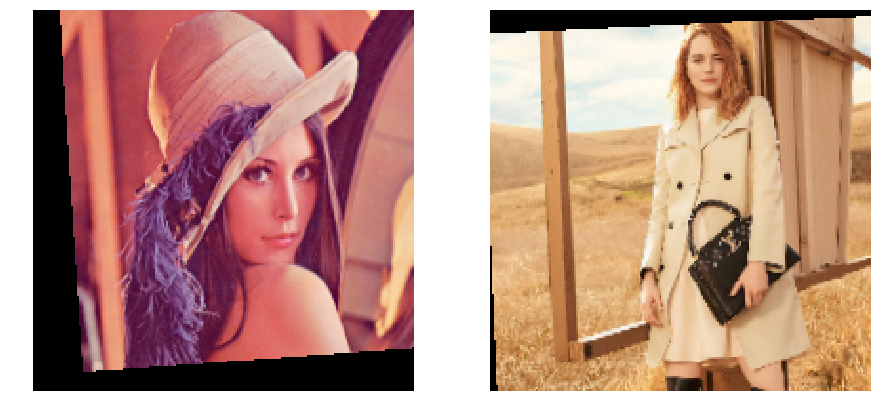

In [7]:
i = 1
batch_gen = img_gen.flow(X, batch_size=2)
for batch in batch_gen:
    plt.subplot(1, 2, i)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.imshow(batch[1, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 2:
        break  # or the generator would loop infinitely

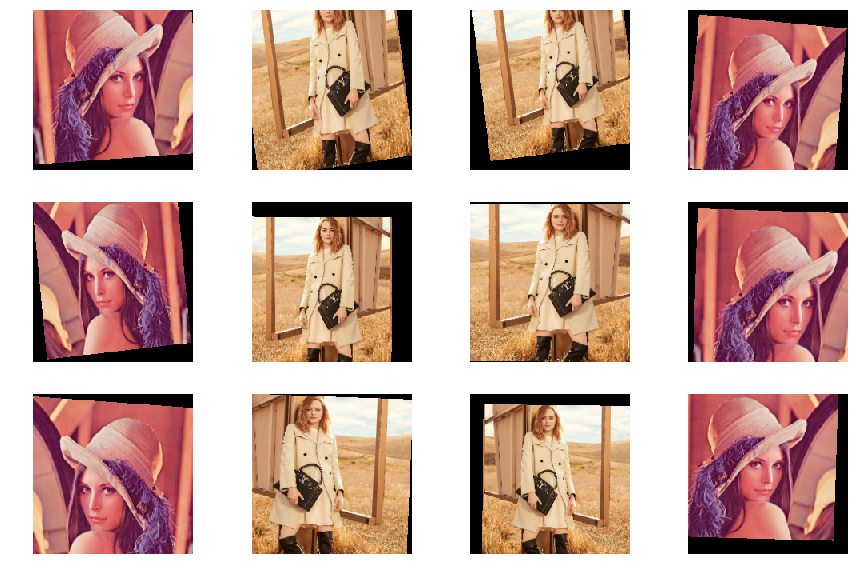

In [8]:
i = 1
batch_gen = img_gen.flow(X, batch_size=1)
plt.figure(1)
for batch in batch_gen:
    plt.subplot(3, 4, i)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 12:
        break  # or the generator would loop infinitely